### Generics

In [227]:
import string
import numpy as np

In [228]:
phrase = "To be, or not to be, that is the question"

phrase = "keth"

In [229]:
phrase_list = [i for i in phrase]

In [230]:
def generate_random_solution(size):
    phrase = ''
    for letter in range(size):
        binary_letter_string = "".join(str(np.random.randint(0,2)) for i in range(5))
        phrase = phrase + binary_letter_string
    return phrase

In [231]:
individual = generate_random_solution(len(phrase))
individual

'01001000011101011110'

In [232]:
int("1111111", 2)

127

In [233]:
#all_letters = string.printable[0:95]
all_letters = string.printable[10:36]
print(all_letters)
print(len(all_letters))

abcdefghijklmnopqrstuvwxyz
26


In [234]:
#The scaler does not limit the max value,
#Instead it map the possible values in 
#The binary string 1111111 from [0, 127] to [0, 94]
#If we use a binary string 11111111 for ex [0, 255]
#The result would be 189 and we must clamp it if needed
#scale(int('11111111', 2))
# -> 189
#def scale(value, new_min = 0, new_max = 94, old_max = 127):
def scale(value, new_min = 0, new_max = 25, old_max = 31):
    return np.round(((value - 0) / (old_max - 0)) * (new_max - new_min) + new_min)

In [235]:
def decode_binary_to_phrase(individual):
    phrase = ""
    for pos in range(0, len(individual), 5):
        binary_letter = str(individual[pos: pos+5])
        #if int(binary_letter, 2) > 94:
        #    int_value = 94
        #else:
        #    int_value = int(binary_letter, 2)
        
        int_value = int(scale(int(binary_letter, 2)))
        
        letter = all_letters[int_value]
        phrase = phrase + letter 
    return phrase

In [236]:
individual_phrase = decode_binary_to_phrase(individual)
individual_phrase

'hbvy'

In [237]:
def individual_score(phrase, individual_phrase):
    phrase_list = [i for i in phrase]
    individual_list = [i for i in individual_phrase]    
    score = 0
    for letter_pos in range(len(phrase)):
        if individual_list[letter_pos] == phrase_list[letter_pos]:
            score += 1
            
    return score

In [238]:
score = individual_score(phrase, individual_phrase)
score

0

In [239]:
text_list = []
for i in range(100):
    individual = generate_random_solution(len(phrase))
    print(individual)
    individual_phrase = decode_binary_to_phrase(individual)
    print(individual_phrase)
    score = individual_score(phrase, individual_phrase)
    print(score)
    text_list.append(individual_phrase)
    print("_"*100 + '\n')

11101110110011010111
xwft
0
____________________________________________________________________________________________________

00001101110011110100
btgq
0
____________________________________________________________________________________________________

00001000111110111100
bcxx
0
____________________________________________________________________________________________________

11110101101111110011
yszp
0
____________________________________________________________________________________________________

01111100010111110010
momp
0
____________________________________________________________________________________________________

01111001000111001001
mdlh
1
____________________________________________________________________________________________________

11111100110011001001
zpfh
1
____________________________________________________________________________________________________

10110110000000001001
stah
1
______________________________________________________________

In [240]:
text_list

['xwft',
 'btgq',
 'bcxx',
 'yszp',
 'momp',
 'mdlh',
 'zpfh',
 'stah',
 'qtig',
 'lzct',
 'cecq',
 'jovr',
 'cirg',
 'eexf',
 'xecm',
 'vrlc',
 'pstc',
 'xttk',
 'eccp',
 'vbbq',
 'ckgf',
 'ylne',
 'kxej',
 'oxpd',
 'njft',
 'pwpf',
 'zuny',
 'xztc',
 'euou',
 'nxtk',
 'gstg',
 'xrzx',
 'zvws',
 'vjtt',
 'txbl',
 'wtcy',
 'gncc',
 'iilt',
 'thxq',
 'sgtv',
 'zcxw',
 'pxwj',
 'lzjz',
 'hrxp',
 'vgxj',
 'kddk',
 'wpku',
 'xmvk',
 'trud',
 'gtoj',
 'ldgw',
 'waiw',
 'xzcc',
 'gqgx',
 'hzen',
 'tbot',
 'uied',
 'pbek',
 'aymf',
 'wdmh',
 'zsuw',
 'dtzm',
 'mykm',
 'xxyp',
 'ylru',
 'cjjx',
 'whnu',
 'fmgr',
 'psog',
 'nnxc',
 'ixvz',
 'xnow',
 'lnut',
 'rsxo',
 'sxkt',
 'jktj',
 'mjsa',
 'okzv',
 'gvis',
 'kxgl',
 'qcdt',
 'wspc',
 'fntw',
 'aiap',
 'xzpt',
 'fmam',
 'ttht',
 'pyhs',
 'jcqy',
 'wlct',
 'ucyc',
 'kgkz',
 'pnnx',
 'tixy',
 'npcz',
 'kxph',
 'cktc',
 'fhuq',
 'xrkg',
 'fmgt']

In [241]:
from PIL import ImageDraw, ImageFont
from PIL import Image as IMG
import os

def string_to_image(text, image_size=(500, 100), font_size=20):
    # Create a new image with a white background
    image = IMG.new("RGB", image_size, "white")
    draw = ImageDraw.Draw(image)

    # You can customize the font and its size
    font = ImageFont.truetype("arial.ttf", font_size)

    # Calculate the text size and position it in the center
    text_width, text_height = draw.textsize(text, font)
    x = (image_size[0] - text_width) / 2
    y = (image_size[1] - text_height) / 2

    # Draw the text on the image
    draw.text((x, y), text, fill="black", font=font)

    return image

In [242]:
import imageio
from IPython.display import display, Image

def generate_GIF(text_list):
    image_folder = "temp_images"
    os.makedirs(image_folder, exist_ok=True)

    image_files = []

    for i, text in enumerate(text_list):
        image = string_to_image(text)
        image_file = os.path.join(image_folder, f"image_{i}.png")
        image.save(image_file)
        image_files.append(image_file)



    output_gif = "output.gif"
    images = [imageio.imread(image_file) for image_file in image_files]
    imageio.mimsave(output_gif, images, duration=1)  # Set the duration (in seconds) per frame

    # Clean up temporary image files
    for image_file in image_files:
        os.remove(image_file)

    #print(f"GIF saved to {output_gif}")


    # Path to your GIF file
    gif_path = "output.gif"

    # Display the GIF
    display(Image(filename=gif_path))

C:\Users\Felps\AppData\Local\Temp\ipykernel_4900\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_4900\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_4900\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_4900\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Fel

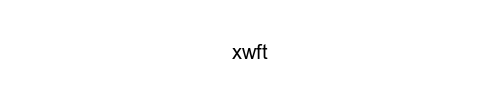

In [243]:
generate_GIF(text_list);

### Simulated Annealing

In [244]:
#def simulated_annealing()

#

In [245]:
#Select a initial Solution
initial_solution = generate_random_solution(len(phrase))

In [246]:
len(initial_solution)

20

In [247]:
def perturbate_solution(s, n):
    for i in range(n):
        pos = np.random.choice(len(s))
        
        binary_list = list(s)
        
        if binary_list[pos] == '0':
            binary_list[pos] = '1'
        else:
            binary_list[pos] = '0'
        
        s = ''.join(binary_list)
    
    return s

In [248]:
initial_solution == perturbate_solution(initial_solution, 1)

False

In [249]:
#Select the temperature change counter
k = 0.95

#Select the temperature cooling Schedule
def cooling_schedule(T, k):
    return k * T

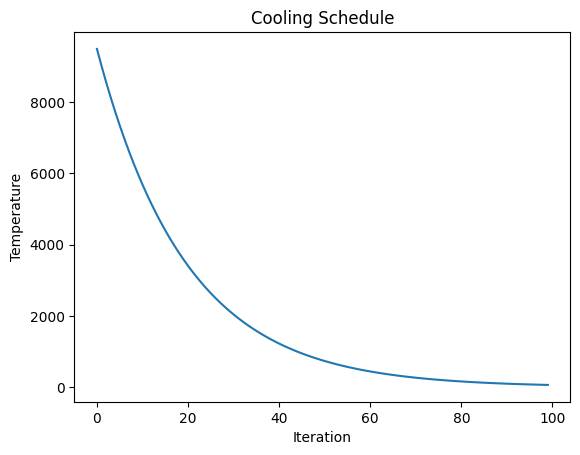

In [250]:
import matplotlib.pyplot as plt

temperature = 10000
k = 0.95
t_list = []
for i in range(100):
    temperature = cooling_schedule(temperature, k)
    t_list.append(temperature)
    
plt.plot(t_list);
plt.title("Cooling Schedule");
plt.xlabel("Iteration");
plt.ylabel("Temperature");

In [253]:
#Select a repetition schedule
#number of iterations executed at each temperature
def repetition_schedule(T):
    #TODO
    return 100

In [261]:
np.exp(-1/1000)

0.999000499833375

In [263]:
individual_score('keth', phrase)

#TODO: trocar score de frase pra score de individuo

4

In [254]:
#Select a initial Solution
s0 = generate_random_solution(len(phrase))
observation = 0

min_temperature = 0.000001
max_temperature = 1000

#Select the temperature change counter
k = 0.999

#Select an initial temperature
T = max_temperature

while T > min_temperature:
    iterations_over_T = repetition_schedule(T)
    for i in range(iterations_over_T):
        
        #Generate a new solution
        s1 = perturbate_solution(s0, 1)
        s1_phrase = decode_binary_to_phrase(s1)
        s0_phrase = decode_binary_to_phrase(s0)
        
        s1_score = individual_score(phrase, s1_phrase)
        s0_score = individual_score(phrase, s0_phrase)
        
        delta = s1_score - s0_score
        
        if delta <= 0:
            s0 = s1
            
        else: #delta > 0
            p = np.exp(-delta/T)
            if np.random.random() < p:
                s0 = s1
                
        observation += 1
    if observation % 10000 == 0:
        print(f"Observation: {observation} | Temperature {T} | score: {s0_score} | p: {p}")
        print(s0_phrase)
        print(s0)
        
    #print(np.exp(-delta/T))
    T = cooling_schedule(T, k)

            

Observation: 10000 | Temperature 905.6978449586682 | score: 1 | p: 0.9988964883286481
leox
01110011011000111101
Observation: 20000 | Temperature 819.4682977764124 | score: 1 | p: 0.9987804408064404
zita
11011010101011100000
Observation: 30000 | Temperature 741.448480636736 | score: 0 | p: 0.9986521977271807
ghuj
01000010011100100011
Observation: 40000 | Temperature 670.8567627695099 | score: 0 | p: 0.9985104792705929
supz
10110100011001111111
Observation: 50000 | Temperature 606.9859307919768 | score: 0 | p: 0.998353871714035
tuxc
11000110010110000010
Observation: 60000 | Temperature 549.1961035890857 | score: 0 | p: 0.9981826310447699
xnka
11100100000111100000
Observation: 70000 | Temperature 496.9083217528519 | score: 0 | p: 0.9979895799504895
syaf
10110101100000000110
Observation: 80000 | Temperature 449.5987473574327 | score: 0 | p: 0.9977782662269741
anwn
00000100001001110000
Observation: 90000 | Temperature 406.79341596116564 | score: 0 | p: 0.9975447688132257
crrg
00110101011010

KeyboardInterrupt: 